# 02. PyTorch 神经网络分类

## 什么是分类问题？

[分类问题](https://en.wikipedia.org/wiki/Statistical_classification)涉及预测某个事物是一个类别还是另一个类别。

例如，你可能想要：

| 问题类型 | 定义 | 示例 |
| ----- | ----- | ----- |
| **二分类** | 目标是两个选项之一，例如是或否 | 根据健康参数预测某人是否患有心脏病。 |
| **多分类** | 目标可以是多个选项之一 | 判断照片中是食物、人还是狗。 |
| **多标签分类** | 目标可以被分配多个选项 | 预测应为维基百科文章分配哪些类别（例如数学、科学和哲学）。 |

<div align="center">
<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-different-classification-problems.png" alt="机器学习中的各种分类，如二分类、多分类和多标签分类" width=900/>
</div>

分类问题和回归问题是最常见的机器学习问题类型之一。

在本笔记本中，我们将使用PyTorch来处理几种不同的分类问题。

换句话说，就是根据一组输入来预测它们属于哪个类别。

## 我们将要覆盖的内容

在本笔记本中，我们将重温在[01. PyTorch 工作流程](./01_pytorch_workflow.ipynb)中介绍的PyTorch工作流程。

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" alt="PyTorch工作流程图" width=900/>

但这次我们将不再尝试预测直线（预测数值，这也是一种回归问题），而是解决一个**分类问题**。

具体而言，我们将涵盖以下内容：

| **主题** | **内容** |
| ----- | ----- |
| **0. 分类神经网络的架构** | 神经网络可以有各种形状和规模，但通常遵循相似的结构。 |
| **1. 准备二分类数据** | 数据可以是任何形式，为了开始，我们将创建一个简单的二分类数据集。 |
| **2. 构建一个PyTorch分类模型** | 在这里，我们将创建一个模型来学习数据中的模式，同时选择**损失函数**、**优化器**并构建一个专门用于分类的**训练循环**。 |
| **3. 将模型拟合到数据（训练）** | 我们有了数据和模型，现在让模型在（**训练**）数据中寻找模式。 |
| **4. 进行预测并评估模型（推理）** | 我们的模型在数据中找到了模式，接下来将它的预测结果与实际的（**测试**）数据进行比较。 |
| **5. 改进模型（从模型的角度）** | 我们已经训练并评估了一个模型，但效果不好，尝试一些方法来改进它。 |
| **6. 非线性** | 目前我们的模型只能拟合直线，那非线性（非直线）怎么办？ |
| **7. 模拟非线性函数** | 我们使用**非线性函数**来帮助建模非线性数据，但它们是什么样的呢？ |
| **8. 多分类问题中的整合** | 将我们在二分类问题中做的所有内容整合到一个多分类问题中。 |

## 0. 分类神经网络的架构

在编写代码之前，先来看看分类神经网络的基本架构。

| **超参数** | **二分类** | **多分类** |
| --- | --- | --- |
| **输入层形状** (`in_features`) | 与特征数量相同（例如心脏病预测中的年龄、性别、身高、体重、吸烟状态共5个特征） | 与二分类相同 |
| **隐藏层** | 根据问题需求设置，最少为1层，最大无限制 | 与二分类相同 |
| **每层隐藏层神经元数量** | 根据问题需求，一般为10到512个 | 与二分类相同 |
| **输出层形状** (`out_features`) | 1（一个类别或另一个） | 每个类别对应1个神经元（例如食物、人、狗的照片，共3个类别） |
| **隐藏层激活函数** | 通常是[ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU)（整流线性单元），但[也可以使用其他激活函数](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions) | 与二分类相同 |
| **输出激活函数** | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function)（在PyTorch中为[`torch.sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html)）| [Softmax](https://en.wikipedia.org/wiki/Softmax_function)（在PyTorch中为[`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)） |
| **损失函数** | [二元交叉熵](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression)（在PyTorch中为[`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)） | 交叉熵（在PyTorch中为[`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)） |
| **优化器** | [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html)（随机梯度下降）、[Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html)（更多选项参见[`torch.optim`](https://pytorch.org/docs/stable/optim.html)） | 与二分类相同 |

当然，分类神经网络组件的具体配置会因问题而异。

但这些信息已经足以帮助我们开始。

在本笔记本中，我们将亲自体验这些设置。

## 1. 创建分类数据并进行准备

让我们从创建一些数据开始。

我们将使用Scikit-Learn中的[`make_circles()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html)方法来生成两组不同颜色的圆圈数据点。

In [1]:
from sklearn.datasets import make_circles

# 生成1000个样本
n_samples = 1000

# 创建圆形数据
X, y = make_circles(n_samples,
                    noise=0.03, # 为数据点添加一些噪声
                    random_state=42) # 保持随机状态，以便获得相同的值

好的，现在让我们查看前5个`X`和`y`的值。

In [2]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


看起来每一个 `y` 值对应两个 `X` 值。

让我们继续遵循数据探索者的座右铭：*可视化，可视化，可视化*，并将它们放入一个 pandas DataFrame 中。

In [3]:
# 创建圆形数据的 DataFrame
import pandas as pd
circles = pd.DataFrame({
    "X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


看起来每对 `X` 特征（`X1` 和 `X2`）对应一个标签（`y`）值，值为0或1。

这表明我们的任务是**二分类**，因为只有两个选项（0或1）。

每个类别有多少个样本？

In [4]:
# 检查不同的标签（lables）
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

每个类别500个，平衡且良好。

让我们将它们绘制出来。

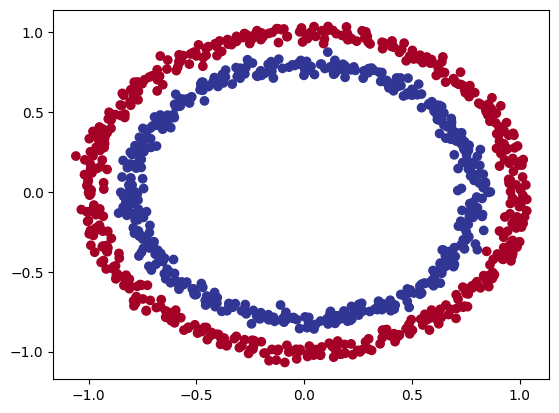

In [5]:
# 可视化
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu)

好的，看起来我们有一个问题需要解决。

让我们了解如何构建一个 PyTorch 神经网络，将点分类为红色（0）或蓝色（1）。

> **注意：** 这个数据集通常被认为是机器学习中的**玩具问题**（用于尝试和测试的简单问题）。
> 
> 但它代表了分类的关键要素，你有一些以数值形式表示的数据，并且希望构建一个能够对其进行分类的模型，在我们的例子中，就是将其分为红点或蓝点。

### 1.1 输入和输出形状

深度学习中最常见的错误之一是形状（shape）错误。

张量及其操作的形状不匹配会导致模型出错。

在整个课程中，我们会经常遇到这些问题。

而且没有万无一失的方法可以确保这些错误不会发生，它们总会出现。

你可以做的是不断熟悉你所处理数据的形状。

我喜欢将其称为输入和输出形状。

问自己：

“我的输入是什么形状，我的输出是什么形状？”

让我们来了解一下。

In [6]:
# 检查我们的特征和标签的形状
X.shape, y.shape

((1000, 2), (1000,))

看起来我们在每个第一维度上都有匹配。

有1000个`X`和1000个`y`。

但`X`的第二维度是什么？

查看单个样本（特征和标签）的值和形状通常很有帮助。

这样做将帮助你了解模型期望的输入和输出形状。

In [7]:
# 查看特征和标签的第一个样本
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


这告诉我们，`X` 的第二个维度表示它有两个特征（向量），而 `y` 则只有一个特征（标量）。

我们有两个输入对应一个输出。

### 1.2 将数据转换为张量并创建训练集和测试集

我们已经研究了数据的输入和输出形状，现在让我们准备将其用于 PyTorch 和建模。

具体来说，我们需要：
1. 将我们的数据转换为张量（现在我们的数据是 NumPy 数组，PyTorch 更喜欢使用 PyTorch 张量）。
2. 将我们的数据拆分为训练集和测试集（我们将在训练集上训练模型，以学习 `X` 和 `y` 之间的模式，然后在测试数据集上评估这些学习到的模式）。

In [8]:
# 将数据转换为张量
# 否则以后计算时会出现问题
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# 查看前五个样本
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

现在我们的数据已经是张量格式，让我们将其拆分为训练集和测试集。

为此，我们将使用 Scikit-Learn 中的实用函数 [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)。

我们将使用 `test_size=0.2`（80% 训练，20% 测试），由于拆分是随机进行的，让我们使用 `random_state=42` 以确保拆分是可重复的。

In [9]:
# 将数据拆分为训练集和测试集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% 测试集，80% 训练集
                                                    random_state=42) # 使随机拆分可复现

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

很好！看起来我们现在有800个训练样本和200个测试样本。

## 2. 构建模型

我们已经准备好了一些数据，现在是时候构建一个模型了。

我们将把它分解为几个部分。

1. 设置设备无关的代码（这样我们的模型可以在 CPU 或 GPU 上运行，如果可用的话）。
2. 通过子类化 `nn.Module` 来构建模型。
3. 定义损失函数和优化器。
4. 创建一个训练循环（将在下一节中进行）。

好消息是我们已经在[笔记本01](./01_pytorch_workflow.ipynb)中完成了上述所有步骤。

只是这次我们将调整它们，使其适用于分类数据集。

让我们先导入 PyTorch 和 `torch.nn`，以及设置设备无关的代码。

In [10]:
# 标准的 PyTorch 导入
import torch
from torch import nn

# 创建设备无关的代码
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

太好了，现在已经设置好了 `device`，我们可以将其用于我们创建的任何数据或模型，PyTorch 会在 CPU（默认）或 GPU（如果可用）上处理它们。

我们来创建一个模型怎么样？

我们需要一个能够处理我们的 `X` 数据作为输入，并生成与 `y` 数据形状相同的输出的模型。

换句话说，给定 `X`（特征），我们希望模型预测 `y`（标签）。

这种具有特征和标签的设置被称为**监督学习**。因为你的数据在给定特定输入时告诉模型输出应该是什么。

要创建这样的模型，它需要处理 `X` 和 `y` 的输入和输出形状。

还记得我说过输入和输出形状很重要吗？在这里我们将看到原因。

让我们创建一个模型类，该类：

1. 继承自 `nn.Module`（几乎所有的 PyTorch 模型都是 `nn.Module` 的子类）。
2. 在构造函数中创建2个 `nn.Linear` 层，能够处理 `X` 和 `y` 的输入和输出形状。
3. 定义一个 `forward()` 方法，包含模型的前向传播计算。
4. 实例化模型类并将其发送到目标 `device`。

In [11]:
# 1. 构建一个继承自 nn.Module 的模型类
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. 创建两个 nn.Linear 层，能够处理 X 和 y 的输入和输出形状
        self.layer_1 = nn.Linear(in_features=2, out_features=5)  # 接受2个特征（X），输出5个特征
        self.layer_2 = nn.Linear(in_features=5, out_features=1)  # 接受5个特征，输出1个特征（y）
    
    # 3. 定义一个包含前向传播计算的 forward 方法
    def forward(self, x):
        # 返回 layer_2 的输出，一个单一特征，与 y 的形状相同
        return self.layer_2(self.layer_1(x))  # 计算先通过 layer_1，然后 layer_1 的输出通过 layer_2
    
# 4. 创建模型实例并将其发送到目标设备
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

### 这里发生了什么？

我们之前见过这些步骤中的一些。

唯一的主要变化发生在 `self.layer_1` 和 `self.layer_2` 之间。

`self.layer_1` 接受2个输入特征 `in_features=2`，并生成5个输出特征 `out_features=5`。

这被称为有5个**隐藏单元**或**神经元**。

这一层将输入数据从2个特征转换为5个特征。

**为什么要这样做？**

这允许模型从5个数字中学习模式，而不仅仅是2个数字，*可能*导致更好的输出。

我之所以说“可能”，是因为有时候它并不起作用。

你可以在神经网络层中使用的隐藏单元数量是一个**超参数**（你可以自己设置的值），没有一个固定的值必须使用。

通常来说，更多会更好，但也有“过多”的情况。你选择的数量将取决于你的模型类型和你正在处理的数据集。

由于我们的数据集小而简单，我们将保持它的小规模。

隐藏单元的唯一规则是下一层，在我们的例子中是 `self.layer_2`，必须接受与前一层 `out_features` 相同的 `in_features`。

这就是为什么 `self.layer_2` 有 `in_features=5`，它接受来自 `self.layer_1` 的 `out_features=5`，并对它们执行线性计算，将其转化为 `out_features=1`（与 `y` 的形状相同）。

![一个类似于我们刚刚构建的分类神经网络在 TensorFlow Playground 网站上的视觉示例](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-tensorflow-playground-linear-activation.png)
*一个类似于我们刚刚构建的分类神经网络在 TensorFlow Playground 网站上的视觉示例。尝试在 [TensorFlow Playground 网站](https://playground.tensorflow.org/) 上创建一个你自己的模型。*

你也可以使用 [`nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) 来实现与上述相同的功能。

`nn.Sequential` 按照它们出现的顺序，对输入数据执行前向传播计算。

In [12]:
# 使用 nn.Sequential 复制 CircleModelV0
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

那看起来比子类化 `nn.Module` 简单得多，为什么不总是使用 `nn.Sequential` 呢？

`nn.Sequential` 非常适合简单的计算，然而，正如其命名空间所示，它*总是*按顺序执行。

所以，如果你需要做其他事情（而不仅仅是简单的顺序计算），你就需要定义你自己的自定义 `nn.Module` 子类。

现在我们有了一个模型，让我们看看当我们将一些数据传递给它时会发生什么。

In [13]:
# 使用模型进行预测
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.1026],
        [-0.0681],
        [-0.0125],
        [-0.1288],
        [ 0.2736],
        [ 0.2924],
        [ 0.1626],
        [ 0.2477],
        [-0.0247],
        [-0.0627]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


看来预测的数量与测试标签的数量相同，但预测值看起来与测试标签的格式或形状不同。

我们可以采取几个步骤来解决这个问题，稍后我们会看到这些步骤。

### 2.1 设置损失函数和优化器

我们之前在[笔记本01](./01_pytorch_workflow.ipynb)中设置过损失（也称为准则或成本函数）和优化器。

但不同的问题类型需要不同的损失函数。

例如，对于回归问题（预测数值），你可能会使用均方误差（MAE）损失。

而对于二分类问题（比如我们的），通常使用[二元交叉熵](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a)作为损失函数。

然而，相同的优化器函数可以在不同问题领域中使用。

例如，随机梯度下降优化器（SGD，`torch.optim.SGD()`）可以用于各种问题，同样适用于Adam优化器（`torch.optim.Adam()`）。

| 损失函数/优化器 | 问题类型 | PyTorch 代码 |
| ----- | ----- | ----- |
| 随机梯度下降（SGD）优化器 | 分类、回归等 | [`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) |
| Adam优化器 | 分类、回归等 | [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) |
| 二元交叉熵损失 | 二分类 | [`torch.nn.BCELossWithLogits`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) 或 [`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) |
| 交叉熵损失 | 多分类 | [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) |
| 平均绝对误差（MAE）或 L1 损失 | 回归 | [`torch.nn.L1Loss`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html) | 
| 均方误差（MSE）或 L2 损失 | 回归 | [`torch.nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) |  

*常见的损失函数和优化器表格，虽然还有更多，但这些是你经常会看到的。*

既然我们正在处理一个二分类问题，我们将使用二元交叉熵损失函数。

> **注意：** 损失函数用于衡量模型预测的“错误”程度，损失越高，模型越差。
> 
> 另外，PyTorch 文档中经常将损失函数称为“损失准则”或“准则”，这些都是描述同一事物的不同表达方式。

PyTorch 提供了两种二元交叉熵实现：
1. [`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) - 创建一个损失函数，用于测量目标（标签）和输入（特征）之间的二元交叉熵。
2. [`torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) - 与上述相同，只是它内置了一个 sigmoid 层（[`nn.Sigmoid`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)）（我们稍后会解释这是什么意思）。

应该使用哪一个？

[`torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) 的文档指出，它比在 `nn.Sigmoid` 层后使用 `torch.nn.BCELoss()` 更具数值稳定性。

因此，一般来说，第二种实现是更好的选择。不过在高级用法中，你可能希望将 `nn.Sigmoid` 和 `torch.nn.BCELoss()` 组合分开，但这超出了本笔记本的范围。

了解了这些后，让我们创建一个损失函数和优化器。

对于优化器，我们将使用 `torch.optim.SGD()` 以学习率0.1优化模型参数。

> **注意：** 关于 `nn.BCELoss` 和 `nn.BCEWithLogitsLoss` 的使用，PyTorch 论坛有[相关讨论](https://discuss.pytorch.org/t/bceloss-vs-bcewithlogitsloss/33586/4)。一开始可能会感到困惑，但随着实践会逐渐变得更容易。

In [14]:
# 创建损失函数
# loss_fn = nn.BCELoss() # BCELoss = 没有内置 sigmoid
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = 内置 sigmoid

# 创建优化器
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.1)

现在让我们创建一个**评估指标**。

评估指标可以提供一个不同的视角，让我们了解模型的表现。

如果损失函数衡量模型的“错误”程度，那么我喜欢将评估指标视为衡量模型的“正确”程度。

当然，你可以认为两者在做同一件事，但评估指标提供了不同的视角。

毕竟，在评估模型时，从多个角度观察是有益的。

分类问题可以使用多种评估指标，但让我们从**准确率**开始。

准确率可以通过将正确预测的总数除以预测的总数来计算。

例如，一个模型在100次预测中正确预测了99次，其准确率为99%。

让我们编写一个函数来实现这一点。

In [15]:
# 计算准确率（分类指标）
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() 计算两个张量中相等的位置
    acc = (correct / len(y_pred)) * 100 
    return acc

现在我们可以在训练模型时使用此函数来测量模型的性能，同时观察损失。

## 3. 训练模型

好了，现在我们已经准备好了损失函数和优化器，开始训练模型吧。

你还记得 PyTorch 训练循环的步骤吗？

如果不记得了，这里是一个提示。

训练步骤：

<details>
    <summary>PyTorch 训练循环步骤</summary>
    <ol>
        <li><b>前向传播</b> - 模型遍历所有训练数据一次，执行其<code>forward()</code>函数计算
            (<code>model(x_train)</code>)。
        </li>
        <li><b>计算损失</b> - 将模型的输出（预测值）与真实值进行比较，并评估其错误程度
            (<code>loss = loss_fn(y_pred, y_train</code>)。
        </li>
        <li><b>清零梯度</b> - 优化器的梯度被设为零（默认会累积）以便重新计算特定训练步骤的梯度
            (<code>optimizer.zero_grad()</code>)。
        </li>
        <li><b>对损失执行反向传播</b> - 计算损失相对于每个待更新的模型参数的梯度（每个参数的
            <code>requires_grad=True</code>）。这称为<b>反向传播</b>，因此使用 "backward"
            (<code>loss.backward()</code>)。
        </li>
        <li><b>优化器步进（梯度下降）</b> - 使用损失梯度更新 <code>requires_grad=True</code> 的参数以改进它们
            (<code>optimizer.step()</code>)。
        </li>
    </ol>
</details>

### 3.1 从模型的原始输出到预测标签（logits -> 预测概率 -> 预测标签）

在训练循环步骤之前，让我们看看在前向传播过程中（由 `forward()` 方法定义）模型输出的内容。

为此，我们将一些数据传递给模型。

In [16]:
# 查看测试数据前向传播的前5个输出
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1026],
        [-0.0681],
        [-0.0125],
        [-0.1288],
        [ 0.2736]], grad_fn=<SliceBackward0>)

由于我们的模型还没有经过训练，所以这些输出基本上是随机的。

但它们*是什么*呢？

它们是我们 `forward()` 方法的输出。

`forward()` 方法实现了两个 `nn.Linear()` 层，其内部调用了以下公式：

$$
\mathbf{y} = x \cdot \mathbf{Weights}^T  + \mathbf{bias}
$$

这个公式的*原始输出*（未修改的 $\mathbf{y}$）以及模型的原始输出通常被称为[**logits**](https://datascience.stackexchange.com/a/31045)。

当模型接收输入数据时（公式中的 $x$ 或代码中的 `X_test`），上面输出的就是 logits。

然而，这些数字很难理解。

我们希望获得一些可以与真实标签进行比较的数字。

为了将模型的原始输出（logits）转换为这种形式，我们可以使用[sigmoid 激活函数](https://pytorch.org/docs/stable/generated/torch.sigmoid.html)。

让我们试试看。

In [17]:
# 对模型的 logits 使用 sigmoid 函数
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4744],
        [0.4830],
        [0.4969],
        [0.4678],
        [0.5680]], grad_fn=<SigmoidBackward0>)

好的，现在输出结果有了一定的**一致性**（尽管它们仍然是随机的）。

这些输出现在是**预测概率**（我通常称之为 `y_pred_probs`），也就是说，这些值表示模型认为数据点属于某个类别的可能性有多大。

在我们的二分类问题中，理想的输出是0或1。

因此，这些值可以视为决策边界。

越接近0，模型越认为样本属于类别0；越接近1，模型越认为样本属于类别1。

更具体地说：
* 如果 `y_pred_probs` >= 0.5，则 `y=1`（类别1）
* 如果 `y_pred_probs` < 0.5，则 `y=0`（类别0）

为了将预测概率转化为预测标签，我们可以对sigmoid激活函数的输出进行四舍五入。

In [18]:
# 找到预测标签（对预测概率进行四舍五入）
y_preds = torch.round(y_pred_probs)

# 完整代码
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# 检查是否相等
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# 去除多余的维度
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 1.], grad_fn=<SqueezeBackward0>)

现在看来我们的模型预测结果与真实标签（`y_test`）的格式一致了。

In [19]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

这意味着我们可以将模型的预测结果与测试标签进行比较，从而评估模型的表现如何。

总结一下，我们使用 sigmoid 激活函数将模型的原始输出（logits）转换为预测概率，然后通过对预测概率进行四舍五入，得到预测标签。

> **注意：** sigmoid 激活函数通常仅用于二分类问题的 logits。对于多分类问题，我们将使用 [softmax 激活函数](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)（稍后会介绍）。
> 
> 此外，当将模型的原始输出传递给 `nn.BCEWithLogitsLoss` 时，不需要使用 sigmoid 激活函数（logits 损失中的“logits”是因为它适用于模型的原始 logits 输出），这是因为它内部已内置了 sigmoid 函数。

### 3.2 构建训练和测试循环

好了，我们已经讨论了如何将模型的原始输出转换为预测标签，现在让我们构建一个训练循环。

我们先从训练 100 个 epoch 开始，并且每 10 个 epoch 输出一次模型的进展情况。

In [20]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
  
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train) 
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69764, Accuracy: 50.38% | Test loss: 0.69530, Test acc: 54.00%
Epoch: 10 | Loss: 0.69573, Accuracy: 50.62% | Test loss: 0.69419, Test acc: 50.50%
Epoch: 20 | Loss: 0.69495, Accuracy: 51.00% | Test loss: 0.69385, Test acc: 48.50%
Epoch: 30 | Loss: 0.69453, Accuracy: 50.25% | Test loss: 0.69373, Test acc: 46.50%
Epoch: 40 | Loss: 0.69424, Accuracy: 50.50% | Test loss: 0.69367, Test acc: 46.00%
Epoch: 50 | Loss: 0.69403, Accuracy: 50.62% | Test loss: 0.69364, Test acc: 45.50%
Epoch: 60 | Loss: 0.69386, Accuracy: 50.38% | Test loss: 0.69362, Test acc: 46.50%
Epoch: 70 | Loss: 0.69371, Accuracy: 50.00% | Test loss: 0.69362, Test acc: 46.50%
Epoch: 80 | Loss: 0.69360, Accuracy: 49.88% | Test loss: 0.69362, Test acc: 46.50%
Epoch: 90 | Loss: 0.69350, Accuracy: 49.88% | Test loss: 0.69364, Test acc: 43.50%


你对模型的表现有什么看法？

看起来模型顺利完成了训练和测试步骤，但结果似乎没有太大改善。

每个数据集的准确率几乎都没有超过 50%。

由于我们处理的是一个平衡的二分类问题，这意味着模型的表现和随机猜测差不多（在拥有 500 个类别 0 和 500 个类别 1 样本的情况下，一个每次都预测类别 1 的模型也会达到 50% 的准确率）。

## 4. 进行预测并评估模型

从指标来看，我们的模型似乎是在随机猜测。

我们如何进一步研究这个问题？

我有个想法。

数据探索的座右铭是：“可视化，可视化，可视化！”

让我们绘制一个图，显示模型的预测结果、模型试图预测的数据以及它为类别 0 或类别 1 创建的决策边界。

为此，我们将编写一些代码，从 [Learn PyTorch for Deep Learning](https://github.com/mrdbourke/pytorch-deep-learning) 仓库中下载并导入 [`helper_functions.py` 脚本](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py)。

该脚本中包含一个有用的函数 `plot_decision_boundary()`，它创建一个 NumPy 网格，用于可视化模型在不同点预测特定类别的情况。

我们还会导入我们在 notebook 01 中编写的 `plot_predictions()` 函数，以便后续使用。

In [21]:
import requests
from pathlib import Path 

# 从 Learn PyTorch 仓库下载辅助函数（如果尚未下载）
if Path("helper_functions.py").is_file():
  print("helper_functions.py exists, skip")
else:
  print("downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py exists, skip


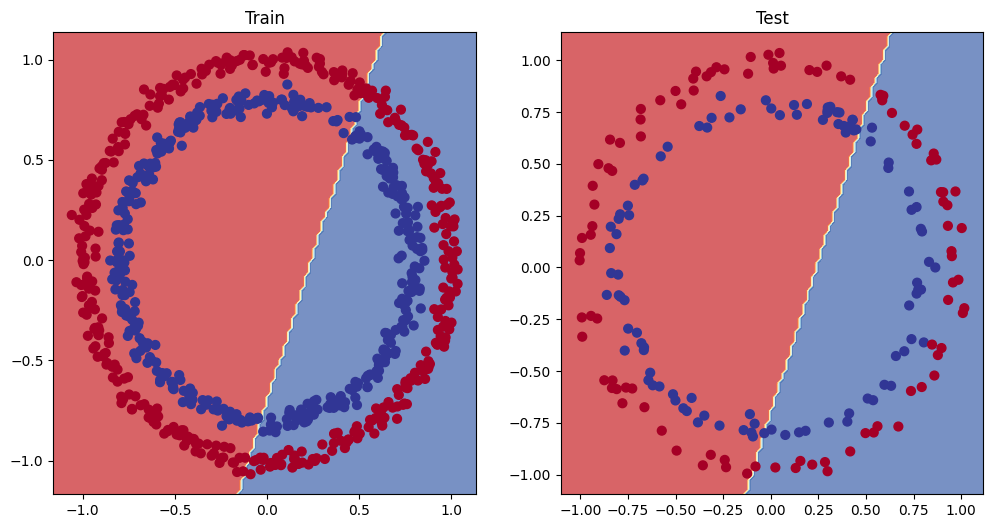

In [22]:
# 绘制训练集和测试集的决策边界
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

看来我们找到了模型性能问题的原因。

目前它正在尝试用一条直线来分隔红色和蓝色的点……

这就解释了为什么准确率是 50%。因为我们的数据是圆形分布的，使用直线最多只能将它从中间切开。

在机器学习术语中，我们的模型 **欠拟合**，这意味着它没有从数据中学习到有效的预测模式。

我们如何改进呢？

## 5. 改进模型（从模型的角度）

让我们尝试解决模型的欠拟合问题。

专注于模型本身（而不是数据），我们有几种方法可以做到这一点。

| 模型改进技术* | 功能描述 |
| ----- | ----- |
| **增加更多层** | 每一层都 *可能* 增强模型的学习能力，每层可以学习到数据中的某种新模式。增加层数通常被称为让神经网络 *更深*。|
| **增加隐藏单元数** | 类似于上述方法，每层的隐藏单元越多，模型的学习能力也 *可能* 增加。增加隐藏单元数通常被称为让神经网络 *更宽*。|
| **延长训练时间（增加 epochs 数）** | 如果模型有更多的机会查看数据，可能会学到更多。|
| **更改激活函数** | 有些数据仅靠直线无法拟合（比如我们遇到的情况），使用非线性激活函数可以帮助解决这个问题（暗示一下）。|
| **更改学习率** | 虽然与模型无关，但学习率决定了优化器每步更改模型参数的幅度。学习率过大模型会过度调整，过小则学不到足够的内容。|
| **更改损失函数** | 同样不是模型特定的，但仍然很重要，不同问题需要不同的损失函数。例如，二分类交叉熵损失函数无法用于多分类问题。|
| **使用迁移学习** | 选用与您的问题领域相似的预训练模型，并将其调整为适合您的问题。我们会在 [notebook 06](./06_pytorch_transfer_learning.ipynb) 中讲解迁移学习。|

> **注意：** *由于可以手动调整以上所有内容，它们被称为 **超参数**。
> 
> 这也是机器学习既是一门艺术也是一门科学的原因。没有一种完美的方法可以直接确定这些参数的最佳组合，遵循数据科学家的座右铭“实验，实验，再实验”是最好的选择。

让我们看看如果在模型中添加一层，延长训练时间（`epochs=1000` 而不是 `epochs=100`），并将隐藏单元数从 `5` 增加到 `10`，会发生什么。

我们将按照上面的步骤进行，但更改了一些超参数。

In [23]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # 添加额外层
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x): # 注意：确保 forward 拼写正确！
        # 这样创建模型与下面的方式是相同的，但下面的方式
        # 在可能的情况下通常会有速度提升。
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

Now we've got a model, we'll recreate a loss function and optimizer instance, using the same settings as before.

In [24]:
# loss_fn = nn.BCELoss() # 需要对输入使用 sigmoid
loss_fn = nn.BCEWithLogitsLoss() # 不需要对输入使用 sigmoid
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

模型、优化器和损失函数已准备好，接下来创建一个训练循环。

这次我们将延长训练时间（`epochs=1000` 而不是 `epochs=100`），看看是否能提升模型效果。

In [25]:
torch.manual_seed(42)

epochs = 1000 # 延长训练时间

# 将数据移到目标设备
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### 训练
    # 1. 前向传播
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> 预测概率 -> 预测标签

    # 2. 计算损失/准确率
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)

    # 3. 优化器梯度清零
    optimizer.zero_grad()

    # 4. 反向传播
    loss.backward()

    # 5. 优化器更新
    optimizer.step()

    ### 测试
    model_1.eval()
    with torch.inference_mode():
        # 1. 前向传播
        test_logits = model_1(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. 计算损失/准确率
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # 每 100 个 epoch 输出一次当前状态
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


我们的模型训练时间更长，且增加了一层，但它看起来仍然没有学到比随机猜测更好的模式。

让我们进行可视化。

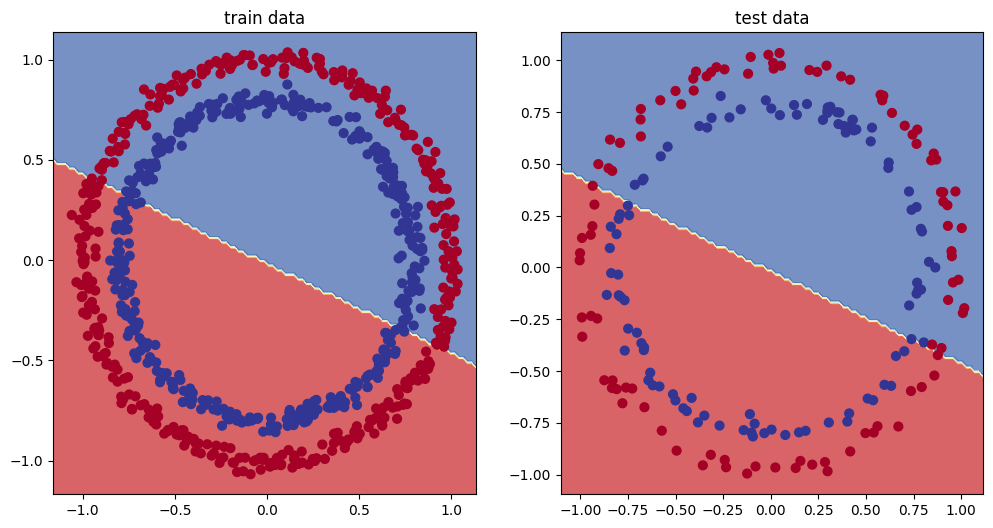

In [26]:
# 绘制训练集和测试集的决策边界
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train data")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test data")
plot_decision_boundary(model_1, X_test, y_test)

嗯。

我们的模型仍然在红点和蓝点之间画了一条直线。

如果我们的模型只能画直线，它能否拟合线性数据？就像我们在 [notebook 01](./01_pytorch_workflow.ipynb) 中所做的那样？

### 5.1 准备数据以检查我们的模型是否能拟合直线

让我们创建一些线性数据，看看我们的模型是否能够拟合它，以确认我们并没有使用一个完全无法学习的模型。

In [27]:
# 创建一些数据（与 notebook 01 相同）
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# 创建数据
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # 线性回归公式

# 检查数据
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

现在让我们将数据划分为训练集和测试集。

In [28]:
# 创建训练集和测试集
train_split = int(0.8 * len(X_regression)) # 80% 的数据用于训练集
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# 检查每个数据集的长度
print(len(X_train_regression), 
    len(y_train_regression), 
    len(X_test_regression), 
    len(y_test_regression))

80 80 20 20


让我们看看数据的分布情况。

为此，我们将使用在 notebook 01 中创建的 `plot_predictions()` 函数。

该函数包含在我们之前下载的 Learn PyTorch for Deep Learning 仓库中的 [`helper_functions.py` 脚本](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py) 中。

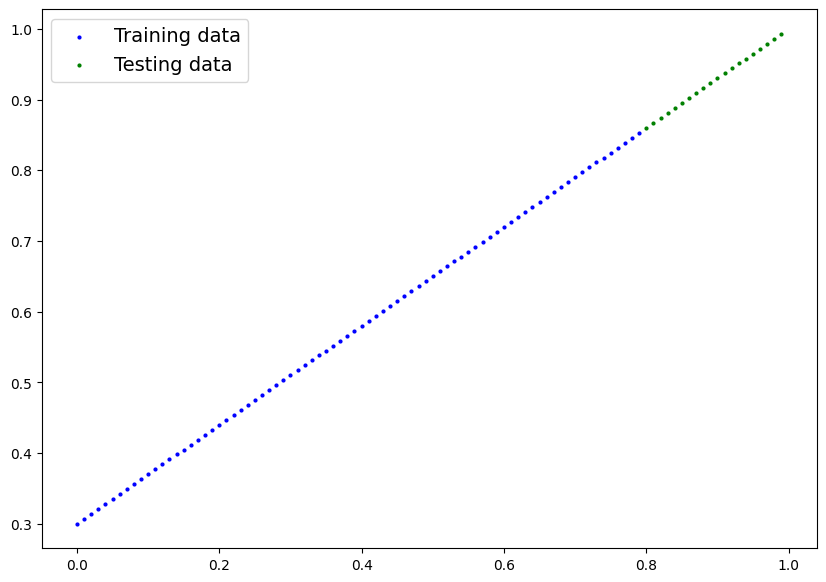

In [29]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

### 5.2 调整 `model_1` 以拟合直线

现在我们有了一些数据，让我们重新创建 `model_1`，但使用适合回归数据的损失函数。

In [30]:
# 与 model_1 相同的架构（但使用 nn.Sequential）
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

我们将损失函数设置为 `nn.L1Loss()`（等同于平均绝对误差），优化器设置为 `torch.optim.SGD()`。

In [31]:
# 损失函数和优化器
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

现在让我们使用常规训练循环步骤训练模型，将 `epochs` 设置为 1000（与 `model_1` 相同）。

> **注意：** 我们一遍又一遍地编写类似的训练循环代码。这是故意设计的，以便多加练习。不过，你有没有想过如何将其封装成函数？这将大大减少未来的编码量。可以考虑创建一个用于训练的函数和一个用于测试的函数。

In [32]:
# 训练模型
torch.manual_seed(42)

# 设置 epochs 数量
epochs = 1000

# 将数据移到目标设备
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### 训练
    # 1. 前向传播
    y_pred = model_2(X_train_regression)
    
    # 2. 计算损失（没有准确率，因为这是回归问题，不是分类问题）
    loss = loss_fn(y_pred, y_train_regression)

    # 3. 优化器梯度清零
    optimizer.zero_grad()

    # 4. 反向传播
    loss.backward()

    # 5. 优化器更新
    optimizer.step()

    ### 测试
    model_2.eval()
    with torch.inference_mode():
      # 1. 前向传播
      test_pred = model_2(X_test_regression)
      # 2. 计算损失
      test_loss = loss_fn(test_pred, y_test_regression)

    # 输出当前状态
    if epoch % 100 == 0: 
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986, test loss: 0.54143
Epoch: 100 | Train loss: 0.09309, test loss: 0.02901
Epoch: 200 | Train loss: 0.07376, test loss: 0.02850
Epoch: 300 | Train loss: 0.06745, test loss: 0.00615
Epoch: 400 | Train loss: 0.06107, test loss: 0.02004
Epoch: 500 | Train loss: 0.05698, test loss: 0.01061
Epoch: 600 | Train loss: 0.04857, test loss: 0.01326
Epoch: 700 | Train loss: 0.06109, test loss: 0.02127
Epoch: 800 | Train loss: 0.05600, test loss: 0.01425
Epoch: 900 | Train loss: 0.05571, test loss: 0.00603


好的，与分类数据上的 `model_1` 不同，`model_2` 的损失确实在下降。

让我们绘制它的预测结果来验证一下。

另外要记住，由于我们的模型和数据都在目标 `device` 上，这个设备可能是 GPU，而我们的绘图函数使用的是 matplotlib，而 matplotlib 不能处理在 GPU 上的数据。

为了解决这个问题，当我们将数据传递给 `plot_predictions()` 时，需要使用 [`.cpu()`](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html) 将所有数据转移到 CPU 上。

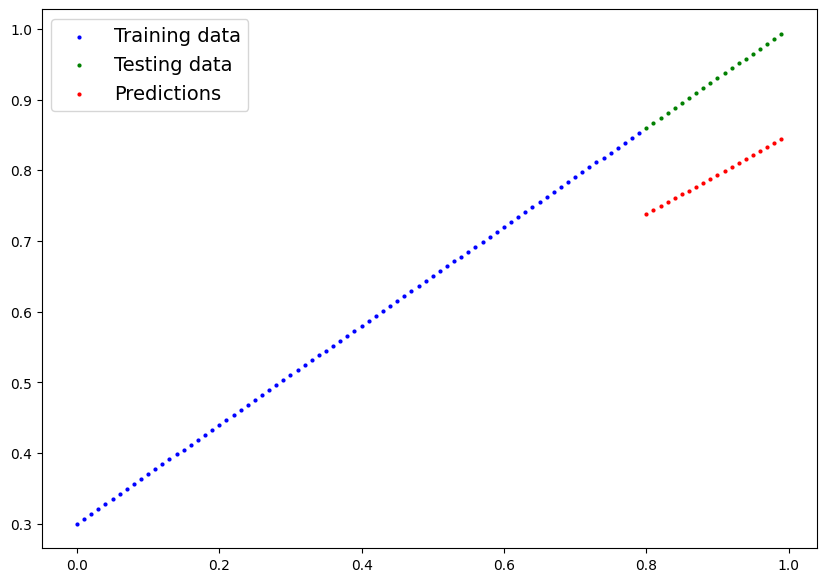

In [33]:
# 开启评估模式
model_2.eval()

# 进行预测（推理）
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# 在 CPU 上绘制数据和预测结果（matplotlib 无法处理 GPU 上的数据）
# （尝试删除下面其中一个 .cpu() 看看会发生什么）
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

好的，看起来我们的模型在拟合直线时比随机猜测好得多。

这是个好现象。

这意味着我们的模型至少具有 *一定* 的学习能力。

> **注意：** 构建深度学习模型时，一个有用的故障排除步骤是从尽可能小的规模开始，以查看模型是否有效，然后再扩大。
>
> 这可能意味着从一个简单的神经网络开始（层数少，隐藏神经元少）并使用一个小数据集（如我们创建的那个），然后在这个小例子上 **过拟合**（让模型表现得过好）之后，再增加数据量或模型的大小/设计以 *减少* 过拟合。

那问题出在哪里呢？

让我们找出答案。

## 6. 缺失的一环：非线性

我们已经看到模型可以画直线（线性）分界线，这要归功于它的线性层。

但是，如果我们让它能够画出非直线（非线性）分界线呢？

怎么做？

让我们来找出答案。

### 6.1 重建非线性数据（红色和蓝色的圆圈）

首先，让我们重新创建数据，以全新开始。我们将使用与之前相同的设置。

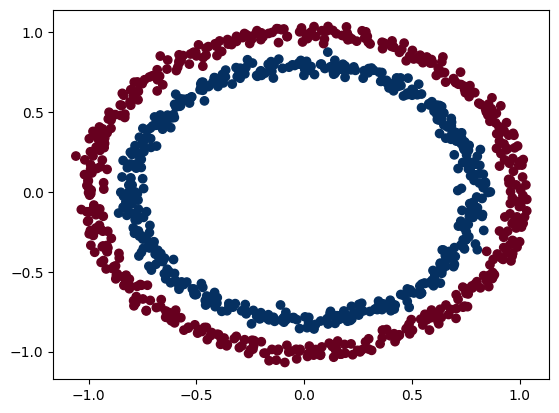

In [34]:
# 创建并绘制数据
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)

现在让我们将数据集分为训练集和测试集，其中 80% 用于训练，20% 用于测试。

In [35]:
# 转换为张量并划分为训练集和测试集
import torch
from sklearn.model_selection import train_test_split

# 将数据转换为张量
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# 划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 构建一个具有非线性的模型

现在进入有趣的部分了。

你觉得如果可以使用无限条直线（线性）和非直线（非线性）分割，你能画出什么样的图案？

我相信你可以创造出非常有趣的图案。

到目前为止，我们的神经网络只使用了线性（直线）函数。

但我们正在处理的数据是非线性的（圆形分布）。

当我们让模型具备使用 **非线性激活函数** 的能力时，你觉得会发生什么？

让我们来看看。

PyTorch 提供了许多现成的 [非线性激活函数](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity)，它们功能相似但有所不同。

其中一个最常用且表现优异的是 [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks))（修正线性单元，[`torch.nn.ReLU()`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)）。

与其讨论它的作用，不如在我们的神经网络中将它放在前向传播的隐藏层之间，看看会发生什么。

In [36]:
# 使用非线性激活函数构建模型
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- 添加 ReLU 激活函数
        # 也可以在模型中加入 sigmoid
        # 这样在预测时就不需要单独调用 sigmoid 了
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # 在各层之间加入 ReLU 激活函数
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


![一个使用 ReLU 激活的分类神经网络在 TensorFlow Playground 中的示例](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-tensorflow-playground-relu-activation.png)
*这是一个类似于我们刚刚构建的分类神经网络的可视化示例（使用 ReLU 激活）。可以在 [TensorFlow Playground 网站](https://playground.tensorflow.org/) 上尝试创建一个属于自己的模型。*

> **问题：** *在构建神经网络时，应该把非线性激活函数放在哪里？*
>
> 一个经验法则是将它们放在隐藏层之间以及输出层之后，但没有固定的做法。随着你对神经网络和深度学习的了解加深，你会发现许多不同的组合方式。在此之前，最好多多尝试，实验，实验，再实验。

现在我们已经准备好模型，让我们创建一个二分类损失函数以及优化器。

In [37]:
# 设置损失函数和优化器 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

### 6.3 训练具有非线性的模型

你已经熟悉流程了，模型、损失函数和优化器都已准备好，让我们创建一个训练和测试循环。

In [38]:
# 拟合模型
torch.manual_seed(42)
epochs = 1000

# 将所有数据移到目标设备上
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. 前向传播
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> 预测概率 -> 预测标签
    
    # 2. 计算损失和准确率
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss 使用 logits 计算损失
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. 优化器梯度清零
    optimizer.zero_grad()

    # 4. 反向传播
    loss.backward()

    # 5. 优化器更新
    optimizer.step()

    ### 测试
    model_3.eval()
    with torch.inference_mode():
      # 1. 前向传播
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> 预测概率 -> 预测标签
      # 2. 计算损失和准确率
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # 输出当前状态
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%


看起来好多了！

### 6.4 评估一个使用非线性激活函数训练的模型

还记得我们的圆形数据是非线性的吗？那么，让我们看看模型在使用非线性激活函数训练后，它的预测效果如何。

In [39]:
# 进行预测
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10] # 希望预测结果的格式与真实标签一致

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

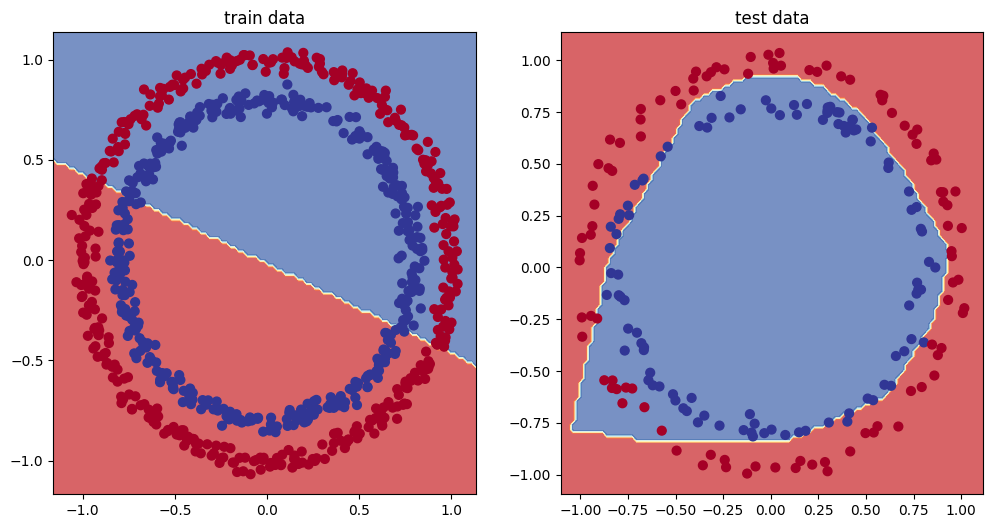

In [40]:
# 绘制训练集和测试集的决策边界
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train data")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = 无非线性
plt.subplot(1, 2, 2)
plt.title("test data")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = 有非线性

很好！虽然不完美，但比之前好得多。

你可能可以尝试一些方法来提高模型的测试准确率？（提示：回到第 5 节获取改进模型的技巧）

## 7. 复现非线性激活函数

我们之前看到，向模型添加非线性激活函数可以帮助它拟合非线性数据。

> **注意：** 你在实际遇到的大部分数据都是非线性的（或者是线性与非线性的组合）。目前我们处理的是二维图上的点数据，但想象一下，如果你有植物的图像需要分类，那么植物有各种不同的形状。或者你想对维基百科的文本进行摘要，单词的组合方式（线性和非线性模式）也千差万别。

那么，非线性激活到底“长”什么样呢？

我们来复现一些激活函数，看看它们的作用吧。

首先，创建少量数据。

In [41]:
# 创建一个示例张量（类似于输入模型的数据）
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

现在让我们把它绘制出来。

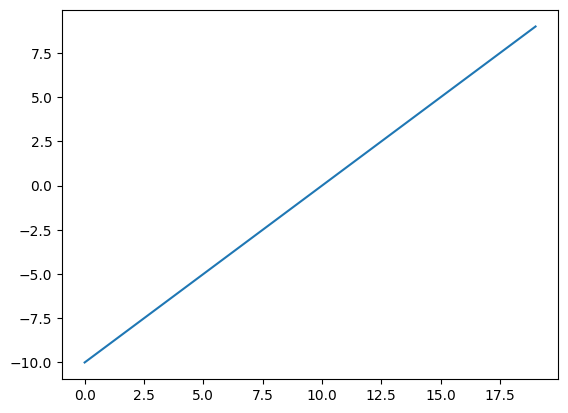

In [42]:
# 可视化示例张量
plt.plot(A)

一条直线，很好。

现在让我们看看 ReLU 激活函数如何影响它。

我们将自己复现 ReLU 函数，而不是使用 PyTorch 的 ReLU（`torch.nn.ReLU`）。

ReLU 函数会将所有负值变为 0，而保留正值不变。

In [43]:
# 手动创建 ReLU 函数
def relu(x):
  return torch.maximum(torch.tensor(0), x) # 输入必须是张量

# 将示例张量传递通过 ReLU 函数
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

看起来我们的 ReLU 函数起作用了，所有负值都变成了零。

让我们把它们绘制出来。

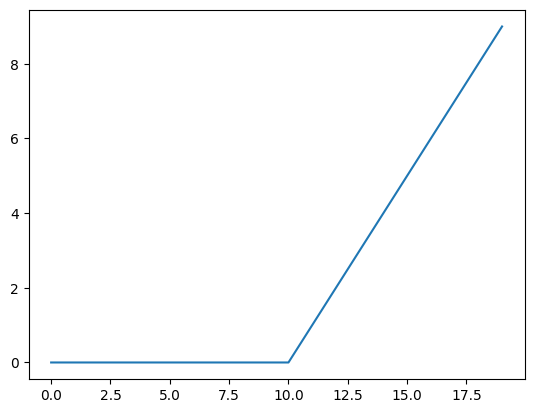

In [44]:
# 绘制经过 ReLU 激活的示例张量
plt.plot(relu(A))

很好！这看起来和 [ReLU 的维基百科页面](https://en.wikipedia.org/wiki/Rectifier_(neural_networks))上的形状完全一致。

我们来试试我们一直在使用的 [sigmoid 函数](https://en.wikipedia.org/wiki/Sigmoid_function) 吧？

sigmoid 函数的公式如下：

$$ out_i = \frac{1}{1+e^{-input_i}} $$ 

或者使用 $x$ 作为输入：

$$ S(x) = \frac{1}{1+e^{-x_i}} $$

其中 $S$ 代表 sigmoid，$e$ 代表 [指数](https://en.wikipedia.org/wiki/Exponential_function)（[`torch.exp()`](https://pytorch.org/docs/stable/generated/torch.exp.html)），$i$ 代表张量中的特定元素。

让我们用 PyTorch 构建一个函数来复现 sigmoid 函数。

In [45]:
# 创建自定义 sigmoid 函数
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

# 在示例张量上测试自定义 sigmoid 函数
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

这些值看起来很像我们之前看到的预测概率，让我们看看它们的可视化效果。

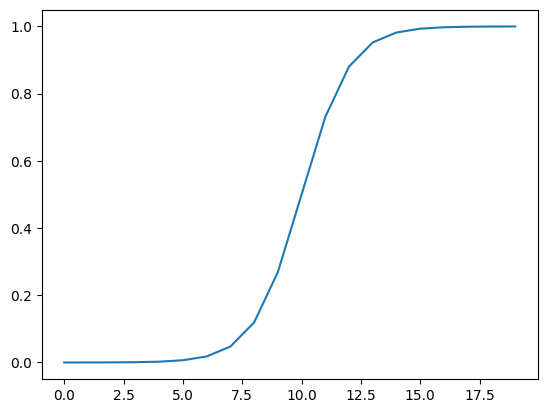

In [46]:
# 绘制经过 sigmoid 激活的示例张量
plt.plot(sigmoid(A))

我们已经从一条直线变成了一条曲线。

在 PyTorch 中还有很多 [非线性激活函数](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity) 我们还没有尝试。

但这两个是最常用的两个。

重点是，用无限数量的线性（直线）和非线性（非直线）线可以绘制出什么样的模式呢？

几乎任何模式，对吧？

这正是当我们将线性和非线性函数结合时，模型所做的事情。

我们并没有告诉模型该怎么做，而是给它工具来找到如何最好地发现数据中的模式。

而这些工具就是线性和非线性函数。

## 8. 综合运用：构建一个多分类 PyTorch 模型

我们已经涵盖了很多内容。

现在，让我们将其应用于一个多分类问题。

回顾一下，**二分类**问题涉及将某物分类为两个选项之一（例如，将一张照片分类为猫或狗的照片），而**多分类**问题则涉及从多于两个选项的列表中对某物进行分类（例如，将一张照片分类为猫、狗或鸡）。

![二分类 vs 多分类示例图，二分类为狗 vs 猫，多分类为狗 vs 猫 vs 鸡](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-binary-vs-multi-class-classification.png)
*二分类与多分类的示例。二分类处理两个类别（某物或另一个），而多分类可以处理超过两个的任意数量的类别。例如，广泛使用的 [ImageNet-1k 数据集](https://www.image-net.org/)是一个计算机视觉的基准数据集，包含 1000 个类别。*

### 8.1 创建多分类数据

要开始一个多分类问题，让我们创建一些多分类数据。

为此，我们可以利用 Scikit-Learn 的 [`make_blobs()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) 方法。

该方法可以根据 `centers` 参数创建我们想要的任意数量的类别。

具体来说，我们将进行以下操作：

1. 使用 `make_blobs()` 创建一些多分类数据。
2. 将数据转换为张量（`make_blobs()` 默认生成的是 NumPy 数组）。
3. 使用 `train_test_split()` 将数据分为训练集和测试集。
4. 可视化数据。

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


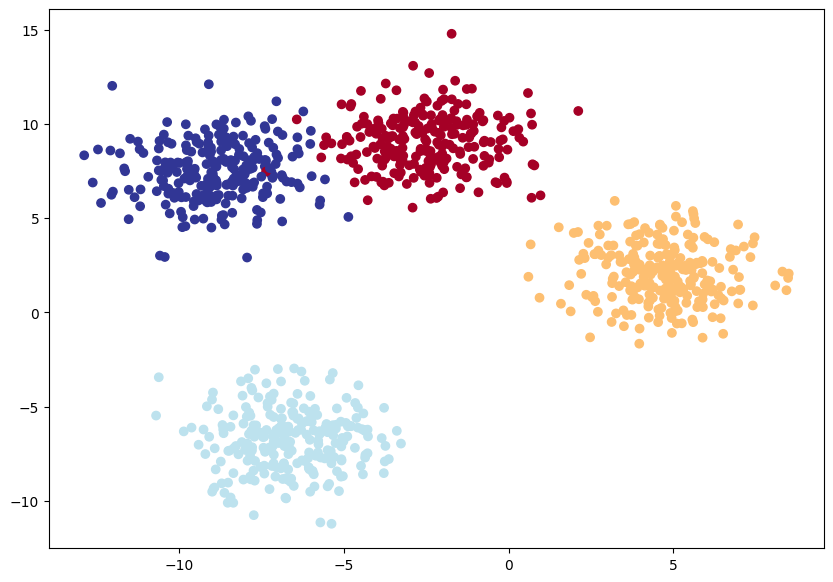

In [47]:
# 导入依赖库
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# 设置数据创建的超参数
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. 创建多分类数据
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X 特征
    centers=NUM_CLASSES, # y 标签 
    cluster_std=1.5, # 使簇稍微扩散（可以尝试将其更改为默认值 1.0）
    random_state=RANDOM_SEED
)

# 2. 将数据转换为张量
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. 划分为训练集和测试集
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. 绘制数据
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

看起来我们已经准备好了一些多分类数据。

让我们构建一个模型来分隔这些彩色斑点。

> **问题：** 这个数据集需要非线性吗？还是可以通过连续的直线将其分隔开？

### 8.2 在 PyTorch 中构建多分类模型

到目前为止，我们已经在 PyTorch 中创建了几个模型。

你可能也开始了解神经网络的灵活性。

我们来构建一个类似于 `model_3` 的模型，但能够处理多分类数据。

为此，让我们创建一个 `nn.Module` 的子类，它接受三个超参数：
* `input_features` - 输入模型的 `X` 特征数。
* `output_features` - 我们理想的输出特征数（这将等于 `NUM_CLASSES` 或多分类问题中的类别数）。
* `hidden_units` - 我们希望每个隐藏层使用的隐藏神经元数量。

既然我们要综合应用，那么让我们设置一些设备无关的代码（在同一个 notebook 中我们不必重复设置，这只是一个提醒）。

接下来，我们将使用上述超参数创建模型类。

In [48]:
# 创建设备无关的代码
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [49]:
from torch import nn

# 构建模型
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """初始化多分类模型所需的所有超参数。

        参数:
            input_features (int): 输入模型的特征数。
            output_features (int): 模型的输出特征数（即类别数）。
            hidden_units (int): 层间的隐藏单元数，默认为 8。
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- 我们的数据集是否需要非线性层？（试试取消注释，看看结果是否有变化）
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- 我们的数据集是否需要非线性层？（试试取消注释，看看结果是否有变化）
            nn.Linear(in_features=hidden_units, out_features=output_features), # 有多少个类别？
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)

# 创建 BlobModel 的实例并将其发送到目标设备
model_4 = BlobModel(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES, 
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

太好了！我们的多分类模型已经准备就绪，接下来为它创建一个损失函数和优化器。

### 8.3 为多分类 PyTorch 模型创建损失函数和优化器

由于我们正在处理一个多分类问题，我们将使用 `nn.CrossEntropyLoss()` 作为损失函数。

我们仍将使用学习率为 0.1 的 SGD 来优化 `model_4` 的参数。

In [50]:
# 创建损失函数和优化器
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), 
                            lr=0.1) # 练习：尝试更改学习率，看看模型性能会发生什么变化

### 8.4 获取多分类 PyTorch 模型的预测概率

好了，我们的损失函数和优化器已经准备好，模型也可以开始训练了。不过在此之前，让我们先进行一次前向传播，看看模型是否正常工作。

In [51]:
# 对数据执行一次前向传播（需要将数据放到目标设备上才能正常工作）
model_4(X_blob_train.to(device))[:5]

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], grad_fn=<SliceBackward0>)

这里输出了什么？

看起来我们得到了每个样本每个特征的一个值。

让我们检查一下形状以确认。

In [52]:
# 单个预测样本中有多少个元素？
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([4]), 4)

很好，我们的模型为每个类别预测了一个值。

还记得我们称模型的原始输出为什么吗？

提示：它的发音和“frog splits”押韵（这些材料的制作没有伤害任何动物）。

如果你猜到是 *logits*，那就正确了。

所以现在我们的模型输出的是 logits，但如果我们想确切知道它给每个样本的标签是什么呢？

也就是说，我们如何从 `logits -> 预测概率 -> 预测标签`，就像在二分类问题中那样？

这就是 [softmax 激活函数](https://en.wikipedia.org/wiki/Softmax_function) 的作用所在。

softmax 函数计算每个预测类别成为实际预测类别的概率，相对于所有其他可能的类别。

如果这还不太明白，让我们在代码中看看。

In [53]:
# 使用模型进行预测，得到 logits
y_logits = model_4(X_blob_test.to(device))

# 在第 1 维度上对 logits 执行 softmax 计算，以获得预测概率
y_pred_probs = torch.softmax(y_logits, dim=1) 
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], grad_fn=<SliceBackward0>)
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], grad_fn=<SliceBackward0>)


这里发生了什么？

softmax 函数的输出可能看起来还是一堆混乱的数字（确实如此，因为我们的模型还没有经过训练，目前是基于随机模式进行预测的），但每个样本的输出有一个非常具体的变化。

在将 logits 通过 softmax 函数后，每个样本的所有值现在加起来等于 1（或非常接近 1）。

让我们检查一下。

In [54]:
# 求 softmax 激活函数第一个样本输出的和
torch.sum(y_pred_probs[0])

tensor(1., grad_fn=<SumBackward0>)

这些预测概率本质上表示模型对目标 `X` 样本（输入）属于每个类别的“信心水平”。

由于 `y_pred_probs` 中每个类别都有一个值，*最高* 值的索引就是模型认为该特定数据样本*最*可能属于的类别。

我们可以使用 `torch.argmax()` 来检查哪个索引的值最高。

In [55]:
# 模型认为第 0 个样本最可能属于哪个类别？
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.1872, 0.2918, 0.1495, 0.3715], grad_fn=<SelectBackward0>)
tensor(3)


可以看到 `torch.argmax()` 的输出是 3，因此对于索引 0 处样本的特征 (`X`)，模型预测最可能的类别值 (`y`) 是 3。

当然，目前这只是随机猜测，因此它有 25% 的正确几率（因为有四个类别）。但我们可以通过训练模型来提高正确几率。

> **注意：** 简而言之，模型的原始输出称为 **logits**。
> 
> 对于多分类问题，要将 logits 转换为 **预测概率**，可以使用 softmax 激活函数（`torch.softmax`）。
>
> 具有最高 **预测概率** 的值的索引就是模型在给定该样本的输入特征时认为最可能的类别编号（尽管这是一个预测，但并不意味着它一定正确）。

### 8.5 为多分类 PyTorch 模型创建训练和测试循环

好了，现在我们已经完成了所有准备步骤，让我们编写一个训练和测试循环来改进和评估模型。

我们之前已经做过很多类似的步骤，因此大部分将是练习。

唯一的区别是我们将调整步骤，将模型输出（logits）转换为预测概率（使用 softmax 激活函数），然后再转换为预测标签（通过对 softmax 激活函数的输出取 argmax）。

让我们将模型训练 `epochs=100`，并每 10 个 epoch 评估一次。

In [56]:
# 训练模型
torch.manual_seed(42)

# 设置 epoch 数量
epochs = 100

# 将数据放到目标设备上
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### 训练
    model_4.train()

    # 1. 前向传播
    y_logits = model_4(X_blob_train) # 模型输出原始 logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # 从 logits -> 预测概率 -> 预测标签
    # print(y_logits)
    # 2. 计算损失和准确率
    loss = loss_fn(y_logits, y_blob_train) 
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. 优化器梯度清零
    optimizer.zero_grad()

    # 4. 反向传播
    loss.backward()

    # 5. 优化器更新
    optimizer.step()

    ### 测试
    model_4.eval()
    with torch.inference_mode():
      # 1. 前向传播
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. 计算测试损失和准确率
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # 每 10 个 epoch 输出一次当前状态
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | 损失: {loss:.5f}, 准确率: {acc:.2f}% | 测试损失: {test_loss:.5f}, 测试准确率: {test_acc:.2f}%") 

Epoch: 0 | 损失: 1.04324, 准确率: 65.50% | 测试损失: 0.57861, 测试准确率: 95.50%
Epoch: 10 | 损失: 0.14398, 准确率: 99.12% | 测试损失: 0.13037, 测试准确率: 99.00%
Epoch: 20 | 损失: 0.08062, 准确率: 99.12% | 测试损失: 0.07216, 测试准确率: 99.50%
Epoch: 30 | 损失: 0.05924, 准确率: 99.12% | 测试损失: 0.05133, 测试准确率: 99.50%
Epoch: 40 | 损失: 0.04892, 准确率: 99.00% | 测试损失: 0.04098, 测试准确率: 99.50%
Epoch: 50 | 损失: 0.04295, 准确率: 99.00% | 测试损失: 0.03486, 测试准确率: 99.50%
Epoch: 60 | 损失: 0.03910, 准确率: 99.00% | 测试损失: 0.03083, 测试准确率: 99.50%
Epoch: 70 | 损失: 0.03643, 准确率: 99.00% | 测试损失: 0.02799, 测试准确率: 99.50%
Epoch: 80 | 损失: 0.03448, 准确率: 99.00% | 测试损失: 0.02587, 测试准确率: 99.50%
Epoch: 90 | 损失: 0.03300, 准确率: 99.12% | 测试损失: 0.02423, 测试准确率: 99.50%


### 8.6 使用 PyTorch 多分类模型进行预测并评估

看起来我们的训练模型表现得相当不错。

但为了确认这一点，让我们进行一些预测并将其可视化。

In [57]:
# 进行预测
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# 查看前 10 个预测结果
y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0727,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2891],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5919, -18.5990,  25.5310,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]])

好的，看起来我们的模型预测结果仍然是 logits 形式。

不过，为了进行评估，它们需要与标签（`y_blob_test`）保持相同的格式，即整数形式。

让我们将模型的预测 logits 转换为预测概率（使用 `torch.softmax()`），然后转换为预测标签（通过对每个样本调用 `argmax()`）。

> **注意：** 可以跳过 `torch.softmax()` 函数，直接从 `预测 logits -> 预测标签`，只需对 logits 直接调用 `torch.argmax()` 即可。
> 
> 例如，`y_preds = torch.argmax(y_logits, dim=1)`，这样可以节省一个计算步骤（不使用 `torch.softmax()`），但会导致没有预测概率可供使用。

In [58]:
# 将预测 logits 转换为预测概率
y_pred_probs = torch.softmax(y_logits, dim=1)

# 将预测概率转换为预测标签
y_preds = y_pred_probs.argmax(dim=1)

# 比较前 10 个模型预测与测试标签
print(f"预测: {y_preds[:10]}\n标签: {y_blob_test[:10]}")
print(f"测试准确率: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

预测: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
标签: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
测试准确率: 99.5%


很好！我们的模型预测现在与测试标签的格式一致。

让我们使用 `plot_decision_boundary()` 将它们可视化。请记住，由于我们的数据在 GPU 上，我们需要将其移至 CPU，以便与 matplotlib 一起使用（`plot_decision_boundary()` 会自动为我们完成这个操作）。

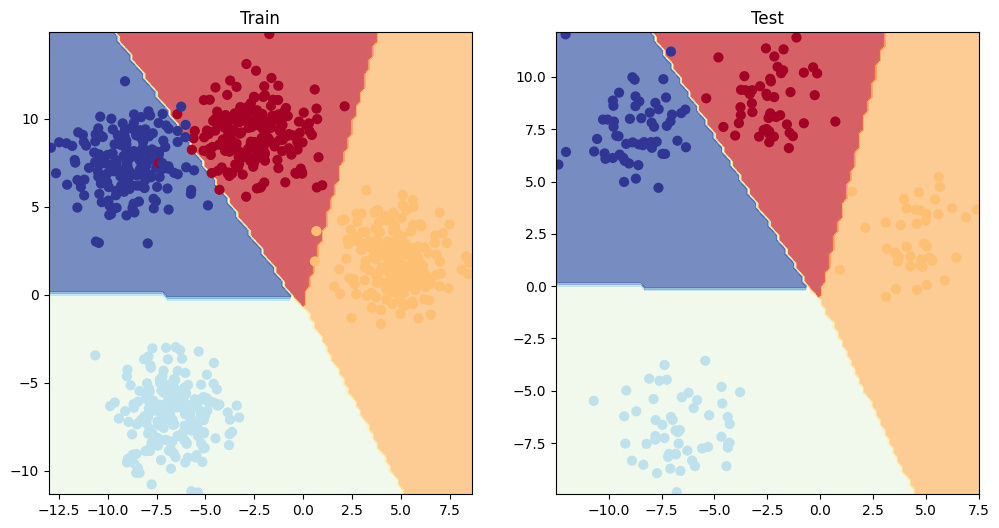

In [59]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. More classification evaluation metrics

So far we've only covered a couple of ways of evaluating a classification model (accuracy, loss and visualizing predictions).

These are some of the most common methods you'll come across and are a good starting point.

However, you may want to evaluate your classification model using more metrics such as the following:

| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`torchmetrics.Accuracy()`](https://torchmetrics.readthedocs.io/en/stable/classification/accuracy.html#id3) or [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`torchmetrics.Precision()`](https://torchmetrics.readthedocs.io/en/stable/classification/precision.html#id4) or [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`torchmetrics.Recall()`](https://torchmetrics.readthedocs.io/en/stable/classification/recall.html#id5) or [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`torchmetrics.F1Score()`](https://torchmetrics.readthedocs.io/en/stable/classification/f1_score.html#f1score) or [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html#confusionmatrix) or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

Scikit-Learn (a popular and world-class machine learning library) has many implementations of the above metrics and you're looking for a PyTorch-like version, check out [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/), especially the [TorchMetrics classification section](https://torchmetrics.readthedocs.io/en/stable/pages/classification.html). 

Let's try the `torchmetrics.Accuracy` metric out.

In [60]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics==0.9.3 # 这是我们在本 notebook 中使用的版本（更高版本可在此处找到：https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog）
    from torchmetrics import Accuracy

# 设置指标并确保它在目标设备上
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# 计算准确率
torchmetrics_accuracy(y_preds, y_blob_test)

  Using cached torchmetrics-0.9.3-py3-none-any.whl.metadata (17 kB)
Using cached torchmetrics-0.9.3-py3-none-any.whl (419 kB)


tensor(0.9950)

## 练习

所有练习都是基于上面章节中的代码。

你应该能够通过参考每个章节或使用提供的资源来完成这些练习。

所有练习都应使用 [设备无关代码](https://pytorch.org/docs/stable/notes/cuda.html#device-agnostic-code)。

**资源：**
* [练习模板笔记本 02](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/02_pytorch_classification_exercises.ipynb)
* [练习解决方案笔记本 02](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/02_pytorch_classification_exercise_solutions.ipynb)（*在*查看此内容之前尝试这些练习）

1. 使用 Scikit-Learn 的 [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) 函数创建一个二分类数据集。
   * 为了保持一致性，数据集应该包含 1000 个样本，并且 `random_state=42`。
   * 将数据转换为 PyTorch 张量。使用 `train_test_split` 将数据划分为训练集和测试集，训练集占 80%，测试集占 20%。

2. 通过继承 `nn.Module` 构建一个模型，该模型包含非线性激活函数，并能够拟合你在第 1 步中创建的数据。
   * 你可以自由选择任何组合的 PyTorch 层（线性和非线性层）。

3. 设置一个适用于二分类的损失函数和优化器，用于训练模型。

4. 创建训练和测试循环，将你在第 2 步中创建的模型拟合到第 1 步中创建的数据上。
   * 要衡量模型的准确性，你可以创建自己的准确率函数，或者使用 [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/) 中的准确率函数。
   * 训练模型足够的时间，使其准确率超过 96%。
   * 训练循环应该每 10 轮输出一次模型的训练和测试集损失及准确率。

5. 使用训练好的模型进行预测，并使用本笔记本中创建的 `plot_decision_boundary()` 函数进行可视化。

6. 用纯 PyTorch 实现 Tanh（双曲正切）激活函数。
   * 你可以参考 [ML备忘单网站](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) 上的公式。

7. 使用 [CS231n 的螺旋数据创建函数](https://cs231n.github.io/neural-networks-case-study/) 创建一个多分类数据集（见下面的代码）。
   * 构建一个能够拟合数据的模型（你可能需要组合使用线性和非线性层）。
   * 构建一个适合处理多分类数据的损失函数和优化器（可选扩展：使用 Adam 优化器替代 SGD，你可能需要尝试不同的学习率来使其有效）。
   * 为多分类数据创建训练和测试循环，并训练模型使其达到 95% 以上的测试准确率（你可以使用任何准确率度量函数）。
   * 在你的模型预测上绘制螺旋数据集的决策边界，`plot_decision_boundary()` 函数也应该适用于该数据集。

```python
# 创建 CS231n 螺旋数据集的代码
import numpy as np
N = 100  # 每个类的样本数
D = 2    # 数据的维度
K = 3    # 类别数
X = np.zeros((N*K, D))  # 数据矩阵（每行 = 一个样本）
y = np.zeros(N*K, dtype='uint8')  # 类别标签
for j in range(K):
  ix = range(N*j, N*(j+1))
  r = np.linspace(0.0, 1, N)  # 半径
  t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2  # 角度
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# 可视化数据
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()
```

## 课外学习

* 写下你认为机器分类可能有用的 3 个问题（这些问题可以是任何内容，发挥创造力，比如，根据购买金额和购买地点的特征将信用卡交易分类为欺诈或非欺诈）。
* 研究梯度优化器中的 "momentum" 概念（如 SGD 或 Adam），它是什么意思？
* 花 10 分钟阅读 [不同激活函数的 Wikipedia 页面](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions)，看看你能将其中多少与 [PyTorch 的激活函数](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity) 对应起来？
* 研究准确率可能是一个不好的度量标准的情况（提示：阅读 [Will Koehrsen 的 "Beyond Accuracy" 文章](https://willkoehrsen.github.io/statistics/learning/beyond-accuracy-precision-and-recall/) 获取思路）。
* **观看：** 为了了解神经网络内部的工作原理以及它们如何学习，观看 [MIT 的深度学习入门视频](https://youtu.be/7sB052Pz0sQ)。